<a href="https://colab.research.google.com/github/hufsaim/T10306201/blob/master/notebook_2022/Lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder, DatasetFolder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
if torch.cuda.is_available():
  device = torch.device('cuda:0')
else:
  device = torch.device('cpu')

print(device)

cuda:0


## Training을 위한 데이터로더를 정의하고 확인하기

In [3]:
path0 = '.'
transform = transforms.Compose(
    [transforms.ToTensor()])

mnist_train = torchvision.datasets.MNIST(path0, train=True, transform=transform, target_transform=None, download=True)
mnist_valid = torchvision.datasets.MNIST(path0, train=False, transform=transform, target_transform=None, download=True)
def get_mnist_labels(labels):
    text_labels = ['0', '1', '2', '3', '4',
                   '5', '6', '7', '8', '9']
    return [text_labels[int(i)] for i in labels]

# defining data_iter, linreg. model, loss, sgd
batch_size = 100
num_workers = 0
train_iter = DataLoader(mnist_train, batch_size, shuffle=True, num_workers=num_workers)
valid_iter = DataLoader(mnist_valid, batch_size, shuffle=False, num_workers=num_workers)

In [4]:
mnist_train

Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [5]:
mnist_valid

Dataset MNIST
    Number of datapoints: 10000
    Root location: .
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )

torch.Size([100])
torch.Size([100, 1, 28, 28])


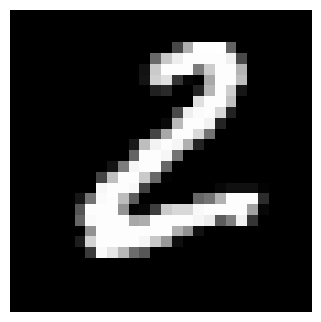

['2']


In [6]:
dataiter=iter(train_iter)
images, labels = dataiter.next()
print(labels.shape)
print(images.shape)
I = images[0].numpy()
plt.figure(dpi=100)

plt.imshow(I[0],cmap='gray')
plt.axis('off')
plt.show()
print(get_mnist_labels([labels[0]]))

## CNN model을 정의하기

In [7]:
net = torch.nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2),
    nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
    nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(in_features=16*5*5, out_features=120),
    nn.Sigmoid(),
    nn.Linear(120, 84),
    nn.Sigmoid(),
    nn.Linear(84, 10)
)
net = net.to(device)
net

Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): Sigmoid()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): Sigmoid()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=400, out_features=120, bias=True)
  (8): Sigmoid()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): Sigmoid()
  (11): Linear(in_features=84, out_features=10, bias=True)
)

In [8]:
X = torch.randn(size=(1,1,28,28), dtype = torch.float32)
X = X.to(device)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape: \t',X.shape)

Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
Sigmoid output shape: 	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
Sigmoid output shape: 	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape: 	 torch.Size([1, 16, 5, 5])
Flatten output shape: 	 torch.Size([1, 400])
Linear output shape: 	 torch.Size([1, 120])
Sigmoid output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 84])
Sigmoid output shape: 	 torch.Size([1, 84])
Linear output shape: 	 torch.Size([1, 10])


## Hyper parameter들을 설정하기

In [19]:
# setting hyper-parameters
learning_rate = 0.5
num_epochs = 40

# loss function and algorithm
loss = torch.nn.CrossEntropyLoss() # loss
alg = torch.optim.SGD(net.parameters(),lr=learning_rate) # sgd

## Model 학습시키기

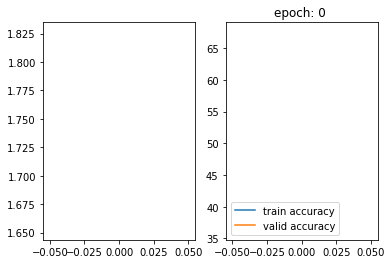

epoch #: 0 train loss:  1.7392374674479167 train accuracy:  36.3316650390625 valid accuracy:  67.5199966430664
epoch #: 1 train loss:  0.524693349202474 train accuracy:  83.30500030517578 valid accuracy:  89.98999786376953
epoch #: 2 train loss:  0.28209592183430987 train accuracy:  91.4000015258789 valid accuracy:  93.08999633789062
epoch #: 3 train loss:  0.1929119873046875 train accuracy:  94.04166412353516 valid accuracy:  95.55000305175781
epoch #: 4 train loss:  0.14553409576416015 train accuracy:  95.51333618164062 valid accuracy:  96.56999969482422
epoch #: 5 train loss:  0.11770951588948568 train accuracy:  96.40666961669922 valid accuracy:  96.7699966430664
epoch #: 6 train loss:  0.10078481674194335 train accuracy:  96.8499984741211 valid accuracy:  97.56999969482422
epoch #: 7 train loss:  0.0872683080037435 train accuracy:  97.2933349609375 valid accuracy:  97.79000091552734


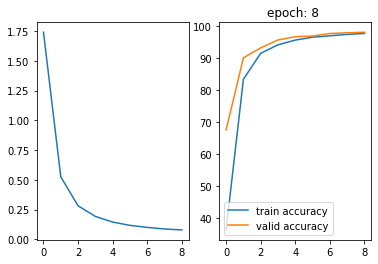

epoch #: 8 train loss:  0.07960535049438476 train accuracy:  97.58333587646484 valid accuracy:  97.95999908447266
epoch #: 9 train loss:  0.07266329447428385 train accuracy:  97.76166534423828 valid accuracy:  98.19000244140625
epoch #: 10 train loss:  0.06622519810994466 train accuracy:  97.91500091552734 valid accuracy:  98.30999755859375
epoch #: 11 train loss:  0.061614761352539064 train accuracy:  98.07333374023438 valid accuracy:  98.41000366210938
epoch #: 12 train loss:  0.05804324467976888 train accuracy:  98.18499755859375 valid accuracy:  98.45999908447266
epoch #: 13 train loss:  0.05448998769124349 train accuracy:  98.36000061035156 valid accuracy:  98.33000183105469
epoch #: 14 train loss:  0.05142520268758138 train accuracy:  98.44499969482422 valid accuracy:  98.5999984741211
epoch #: 15 train loss:  0.04823105176289876 train accuracy:  98.53166961669922 valid accuracy:  98.27999877929688


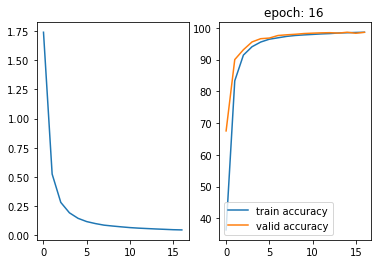

epoch #: 16 train loss:  0.0464311949412028 train accuracy:  98.59666442871094 valid accuracy:  98.58000183105469
epoch #: 17 train loss:  0.04382052739461263 train accuracy:  98.6933364868164 valid accuracy:  98.62999725341797
epoch #: 18 train loss:  0.041964728037516275 train accuracy:  98.72666931152344 valid accuracy:  98.52999877929688
epoch #: 19 train loss:  0.0404355525970459 train accuracy:  98.788330078125 valid accuracy:  98.58000183105469
epoch #: 20 train loss:  0.03799364407857259 train accuracy:  98.86166381835938 valid accuracy:  98.77999877929688
epoch #: 21 train loss:  0.03667510986328125 train accuracy:  98.88500213623047 valid accuracy:  98.76000213623047
epoch #: 22 train loss:  0.035218817392985026 train accuracy:  98.9366683959961 valid accuracy:  98.58999633789062
epoch #: 23 train loss:  0.03430381457010905 train accuracy:  98.94166564941406 valid accuracy:  98.77999877929688


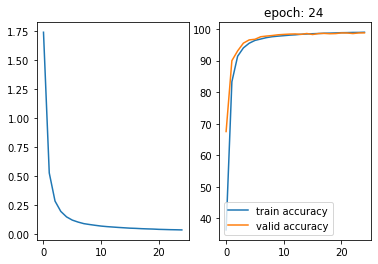

epoch #: 24 train loss:  0.03310667037963867 train accuracy:  99.0 valid accuracy:  98.80000305175781
epoch #: 25 train loss:  0.031367794672648115 train accuracy:  99.06666564941406 valid accuracy:  98.76000213623047
epoch #: 26 train loss:  0.03011567751566569 train accuracy:  99.08999633789062 valid accuracy:  98.83999633789062
epoch #: 27 train loss:  0.02963173548380534 train accuracy:  99.11000061035156 valid accuracy:  98.9000015258789
epoch #: 28 train loss:  0.028735888799031575 train accuracy:  99.13666534423828 valid accuracy:  98.68000030517578
epoch #: 29 train loss:  0.027691644032796225 train accuracy:  99.15333557128906 valid accuracy:  98.93000030517578
epoch #: 30 train loss:  0.027266178131103515 train accuracy:  99.16500091552734 valid accuracy:  98.79000091552734
epoch #: 31 train loss:  0.025857330958048503 train accuracy:  99.21833038330078 valid accuracy:  98.80000305175781


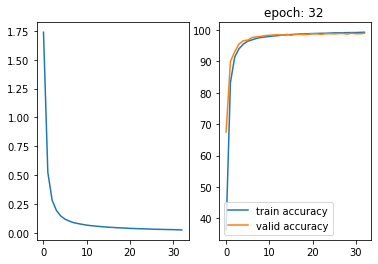

epoch #: 32 train loss:  0.024752715428670247 train accuracy:  99.26667022705078 valid accuracy:  98.93000030517578
epoch #: 33 train loss:  0.023575453758239745 train accuracy:  99.288330078125 valid accuracy:  98.83000183105469
epoch #: 34 train loss:  0.023829069137573242 train accuracy:  99.27999877929688 valid accuracy:  98.93000030517578
epoch #: 35 train loss:  0.022860833803812663 train accuracy:  99.27666473388672 valid accuracy:  98.66999816894531
epoch #: 36 train loss:  0.02213504473368327 train accuracy:  99.36166381835938 valid accuracy:  98.52999877929688
epoch #: 37 train loss:  0.020941057205200196 train accuracy:  99.37333679199219 valid accuracy:  98.75
epoch #: 38 train loss:  0.020664421717325847 train accuracy:  99.39666748046875 valid accuracy:  98.9000015258789
epoch #: 39 train loss:  0.019881914456685384 train accuracy:  99.40666961669922 valid accuracy:  98.48999786376953


In [20]:
# training the model
loss_train = np.array([])
accs_train = np.array([])
accs_valid = np.array([])

for epoch in range(num_epochs):
  i=0
  l_epoch = 0
  correct = 0
  for X,y in train_iter:
    i=i+1
    X,y = X.to(device),y.to(device) # GPU 
    y_hat=net(X)
    correct += (y_hat.argmax(dim=1)==y).sum()
    l=loss(y_hat,y)
    l_epoch+=l
    alg.zero_grad()
    l.backward()
    alg.step()

  loss_train = np.append(loss_train,l_epoch.cpu().detach().numpy()/i)
  accs_train = np.append(accs_train,(100*correct.cpu())/len(mnist_train))

  correct = 0
  for X,y in valid_iter:
    X,y = X.to(device),y.to(device)
    y_hat = net(X)
    correct += (y_hat.argmax(dim=1)==y).sum()

  accs_valid = np.append(accs_valid,(100*correct.cpu())/len(mnist_valid))

  if epoch%8 == 0:
    plt.subplot(121)
    plt.plot(loss_train,label='train loss')
    plt.subplot(122)
    plt.plot(accs_train,label='train accuracy')
    plt.plot(accs_valid,label='valid accuracy')
    plt.legend(loc='lower left')
    plt.title('epoch: %d '%(epoch))
    plt.show()

  print('epoch #:',epoch,'train loss: ',loss_train[-1],'train accuracy: ',accs_train[-1],'valid accuracy: ',accs_valid[-1])

## Validation Set에 대한 결과 확인하기

In [21]:
i = 0
y_all=[]
y_hat_all=[]
for X,y in valid_iter:
  i=i+1
  X=X.to(device)
  y_hat = net(X)    
  y_hat = y_hat.argmax(dim=1)
  y_all.append(y)
  y_hat_all.append(y_hat)
y_all = torch.cat(y_all,dim=0)
y_hat_all = torch.cat(y_hat_all,dim=0)

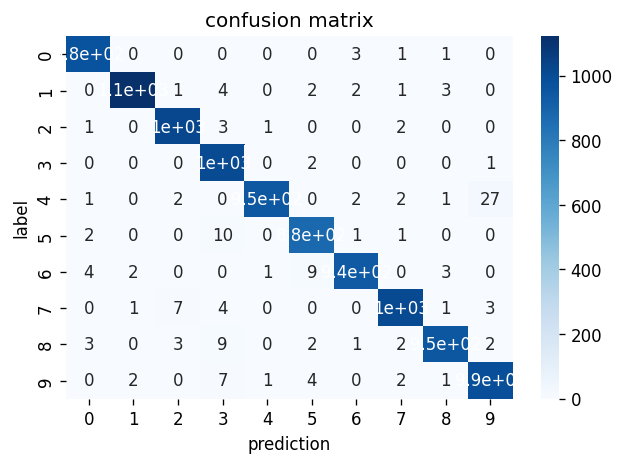

In [22]:
cf = confusion_matrix(y_all.numpy(),y_hat_all.cpu().numpy())
plt.figure(dpi=120)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.title('confusion matrix')
plt.ylabel('label')
plt.xlabel('prediction')
plt.show()

## TEST를 위한 데이터로더를 정의하고 확인하기

In [23]:
transform_test = transforms.Compose(
    [
        transforms.Grayscale(),
        transforms.Resize((28,28)),
        transforms.ToTensor()
    ])

In [24]:
path_test = '/content/drive/MyDrive/data/hufs_mnist_png/testing2' # replace with your path
data_test = ImageFolder(root=path_test,transform=transform_test)

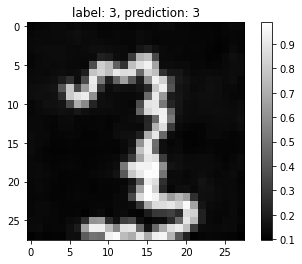

In [25]:
n=72
X = data_test[n][0].unsqueeze(0)
y = data_test[n][1]
y_hat = net(X.to(device))
y_hat = y_hat.argmax(dim=1)
plt.imshow(X[0,0],cmap='gray')
plt.title(f'label: {y}, prediction: {y_hat.cpu().numpy()[0]}')
plt.colorbar()
plt.show()

In [26]:
#len(data_test)
results = np.zeros((2,len(data_test)))

In [27]:
num_incorrect = 0
flag_plot = 0
for n in range(len(data_test)):
  X = data_test[n][0].unsqueeze(0)
  y = data_test[n][1]
  y_hat = net(X.to(device))    
  y_hat = y_hat.argmax(dim=1)

  results[0,n] = y
  results[1,n] = y_hat
  if y_hat != y:
    num_incorrect+=1
    
    if flag_plot == 1:
      plt.figure(dpi=80)
      plt.imshow(X[0].cpu().squeeze(),cmap='gray')
      plt.title('label: %s \n prediction: %s'%(get_mnist_labels([y]),get_mnist_labels([y_hat])))
      plt.axis('off')
      plt.show()

acc = 100*(len(data_test)-num_incorrect)/len(data_test)
print(f'accuracy: {acc}')

accuracy: 44.5


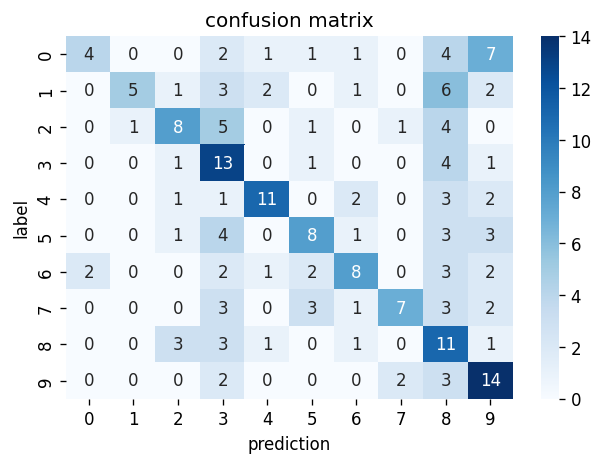

In [28]:
cf = confusion_matrix(results[0,:],results[1,:])
plt.figure(dpi=120)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.title('confusion matrix')
plt.ylabel('label')
plt.xlabel('prediction')
plt.show()